<a href="https://colab.research.google.com/github/rsriramiyengar/S6/blob/master/EVA5_Submission_Session_6_in_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Objective take best 5th code, and run below versions for 25 epochs and report findings:

>> 1. with L1 + BN
2. with L2 + BN
3. with L1 and L2 with BN
4. with GBN
5. with L1 and L2 with GBN


* *You need to write a single loop or iterator to iterate through these conditions.*

* Draw ONE graph to show the validation accuracy curves for all 5 jobs above. This graph must have proper legends and it should be clear what we are looking at.

* Draw ONE graph to show the loss change curves for all 5 jobs above. This graph must have proper legends and it should be clear what we are looking at.

* Find any 25 misclassified images (combined into single image) for "with GBN" model. You should be using the saved model from the above jobs.  You MUST show the actual and predicted class names.

Submitted By: 
* Gaurav Makkar
* Mohit Bhandari
* Suman Debnath
* Sriram Iyengar




## Import `pytorch` libraries and modules:

In [ ]:
from __future__ import print_function
import torch
#import nueral net model in the torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#torchvision is the libraray in torch that has many features
#and we are using datasets and transforms from this library 
from torchvision import datasets, transforms

In [ ]:
!rm -rf EVA5
!git clone https://github.com/EVA5-Stars/EVA5.git

Cloning into 'EVA5'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 157 (delta 89), reused 91 (delta 43), pack-reused 0
Receiving objects: 100% (157/157), 620.15 KiB | 888.00 KiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls /content/gdrive/My\ Drive/Colab\ Notebooks/EVA5/S6

Mounted at /content/gdrive
EVA5_Submission_Session_6_inprogress.ipynb
EVA5:Submission-Session_6_Model-BatchNormalization.pt
EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt
L1EVA5:Submission-Session_6_Model-BatchNormalization.pt
L1EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt


In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## Project Library:

*   Ghost Batch Normalization
*   Misclassified image collection
*   Load the testing and training data with configurabe *batch_size*
*   Plot the Loss and Accuracy Graph
*   Define the structure of the network
*   Setup to create model and summary
*   Load the testing and training data with configurabe *batch_size*
*   Define test and train functions
*   Create a function to *initiate_training* for all conditions





**Ghost Batch Normalization**: 

A technique originally developed for training with very large batch sizes across many accelerators. 

In [ ]:
#from EVA5.S6.BatchNorm_GhostBatchNorm import GhostBatchNorm
#from EVA5.S6.BatchNorm_GhostBatchNorm import BatchNorm

**Collecting Misclassified Images**

In [ ]:
#from S6.S6_plot_misclassfied_image_finder import misclassified_image_finder              
def misclassified_image_finder(model, model_path, device, train_loader, image_num, msg):
    
    data_iter = iter(test_loader)
    figure = plt.figure()

    plt.title('Misclassified Images: With {}'.format(msg))
   
    for _i in range(image_num):
          data, target = data_iter.next()

          model.load_state_dict(torch.load(model_path)) 
          model.eval()

          data, target = data.to(device), target.to(device)

          output = model(data)
          pred = output.argmax(dim=1, keepdim=True) 
          leng=len(pred)
          for a in range(leng):
              if(pred[a]!=target[a]):                  
                  plt.subplot(5,5,_i+1)
                  plt.axis('off')
                  plt.imshow(data[a].cpu().numpy().squeeze(),cmap='gray_r')
                  

Plot the Loss and Accuracy Graph

In [ ]:
from EVA5.S6.S6_plot_stat_loss_acc import plot_stat

Define the structure of the network

In [ ]:
from EVA5.S6.S6_Model_structure_create import Net

Setup to create model and summary

In [ ]:
from EVA5.S6.S6_Model_structure_create import create_model

Load the testing and training data with configurabe *batch_size*

In [ ]:
from EVA5.S6.S6_data_loader import init_train_test_loader

Define test and train functions

In [ ]:
from EVA5.S6.S6_train_test_function import train
from EVA5.S6.S6_train_test_function import test   


Create a function to *initiate_training* for all conditions

In [ ]:
from torch.optim.lr_scheduler import StepLR
from EVA5.S6.S6_init_training import init_training   


 Initialize train and test loader with Batch Size:128


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Run: Initialization and trainings

Create the model with normal BatchNormalization

In [ ]:
model = create_model(device,gbatnor=False)
# Set the Epoch
EPOCHS = 25
model_name_bn = "EVA5:Submission-Session_6_Model-BatchNormalization.pt"
save_path_bn = F"/content/gdrive/My Drive/Colab Notebooks/EVA5/S6/{model_name_bn}"
torch.save(model.state_dict(), save_path_bn)
print("Model Saved: {}".format(model_name_bn))

Create the instance of the Net class with GBN = False

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
      BatchNorm2d-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10] 

Create the model with Ghost BatchNormalization

In [ ]:
model1 = create_model(device, gbatnor=True)
model_name_gbn = "EVA5:Submission-Session_6_Model-GhostBatchNormalization.pt"
save_path_gbn = F"/content/gdrive/My Drive/Colab Notebooks/EVA5/S6/{model_name_gbn}"
torch.save(model1.state_dict(), save_path_gbn)
print("Model Saved: {}".format(model_name_gbn))

Create the instance of the Net class with GBN = True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
    GhostBatchNorm-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
    GhostBatchNorm-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
   GhostBatchNorm-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
   GhostBatchNorm-13           [-1, 16, 10, 10]   

1. Cases


In [ ]:
# Total Loss & Accuracy
total_train_losses = []
total_train_accuracies = []

total_test_losses = []
total_test_accuracies = []
#####
train_loader, test_loader = init_train_test_loader()
# with L1 and BN
Case1=["L1 and BN",model, device, train_loader, EPOCHS, False, 1e-5, False]
# with L2 and BN
Case2=["L2 and BN",model, device, train_loader, EPOCHS,False, None, True]
# with L1, L2 and BN
Case3=["L1, L2 and BN",model, device, train_loader, EPOCHS,  True, 1e-5,True]
# with GBN
Case4=["GBN",model1, device, train_loader, EPOCHS, False, 1e-5,False]
# with L1, L2 and GBN
Case5=["L1, L2 and GBN",model1, device, train_loader, EPOCHS, True, 1e-5, True]

Cases=[Case1,Case2,Case3,Case4,Case5]
for case in Cases:
  # Loss train & test
  train_losses = []
  test_losses = []  
  # Accuracy train & test
  train_acc = []
  test_acc = []
  case_name,model, device, train_loader, epochs, step_lr, l1_lambda, l2_en=case
  print(" Below output is for Case",case_name)
  #print(*case)
  init_training(model, device, train_loader, epochs,train_losses,train_acc,test_losses,test_acc, step_lr=step_lr, l1_lambda=l1_lambda, l2_en=l2_en)
  total_train_losses.extend([train_losses])
  total_train_accuracies.extend([train_acc])
  total_test_losses.extend([test_losses])
  total_test_accuracies.extend([test_acc])
  print(total_test_losses)
  print(total_test_accuracies)

Loss=2.351052761077881 Batch_id=0 Accuracy=8.59:   0%|          | 1/469 [00:00<01:16,  6.13it/s]


 Initialize train and test loader with Batch Size:128
 Below output is for Case L1 and BN


Loss=0.23027123510837555 Batch_id=468 Accuracy=86.80: 100%|██████████| 469/469 [00:55<00:00,  8.48it/s]



 Epoch 0, lr 0.01


Loss=0.27114158868789673 Batch_id=0 Accuracy=96.09:   0%|          | 1/469 [00:00<00:56,  8.28it/s]


Test set: Average loss: 0.2329, Accuracy: 9655/10000 (96.55%)



Loss=0.24084778130054474 Batch_id=468 Accuracy=96.63: 100%|██████████| 469/469 [00:54<00:00,  8.54it/s]



 Epoch 1, lr 0.01


Loss=0.13123252987861633 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:53,  8.68it/s]


Test set: Average loss: 0.1260, Accuracy: 9743/10000 (97.43%)



Loss=0.14170759916305542 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:55<00:00,  8.51it/s]



 Epoch 2, lr 0.01


Loss=0.1604025959968567 Batch_id=0 Accuracy=96.09:   0%|          | 1/469 [00:00<00:55,  8.42it/s]


Test set: Average loss: 0.0943, Accuracy: 9806/10000 (98.06%)



Loss=0.09604119509458542 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]



 Epoch 3, lr 0.01


Loss=0.06593607366085052 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<01:00,  7.68it/s]


Test set: Average loss: 0.0680, Accuracy: 9869/10000 (98.69%)



Loss=0.060051701962947845 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:54<00:00,  8.53it/s]



 Epoch 4, lr 0.01


Loss=0.09984823316335678 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:53,  8.79it/s]


Test set: Average loss: 0.0631, Accuracy: 9869/10000 (98.69%)



Loss=0.14010289311408997 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]



 Epoch 5, lr 0.01


Loss=0.08990460634231567 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:53,  8.70it/s]


Test set: Average loss: 0.0516, Accuracy: 9881/10000 (98.81%)



Loss=0.07136587798595428 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]



 Epoch 6, lr 0.01


Loss=0.08571170270442963 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:55,  8.48it/s]


Test set: Average loss: 0.0485, Accuracy: 9884/10000 (98.84%)



Loss=0.060759492218494415 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]



 Epoch 7, lr 0.01


Loss=0.07581890374422073 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<01:04,  7.28it/s]


Test set: Average loss: 0.0477, Accuracy: 9879/10000 (98.79%)



Loss=0.05851052328944206 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:54<00:00,  8.54it/s]



 Epoch 8, lr 0.01


Loss=0.041724156588315964 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:54,  8.63it/s]


Test set: Average loss: 0.0457, Accuracy: 9889/10000 (98.89%)



Loss=0.06356308609247208 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:54<00:00,  8.54it/s]



 Epoch 9, lr 0.01


Loss=0.09158387035131454 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:54,  8.60it/s]


Test set: Average loss: 0.0497, Accuracy: 9873/10000 (98.73%)



Loss=0.06593872606754303 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:54<00:00,  8.54it/s]



 Epoch 10, lr 0.01


Loss=0.0888138934969902 Batch_id=0 Accuracy=96.09:   0%|          | 1/469 [00:00<00:54,  8.63it/s]


Test set: Average loss: 0.0427, Accuracy: 9880/10000 (98.80%)



Loss=0.11823265254497528 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:54<00:00,  8.56it/s]



 Epoch 11, lr 0.01


Loss=0.0730455294251442 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:58,  7.96it/s]


Test set: Average loss: 0.0373, Accuracy: 9904/10000 (99.04%)



Loss=0.03918289393186569 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:55<00:00,  8.53it/s]



 Epoch 12, lr 0.01


Loss=0.0464884489774704 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:54,  8.52it/s]


Test set: Average loss: 0.0395, Accuracy: 9898/10000 (98.98%)



Loss=0.04914826899766922 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:55<00:00,  8.50it/s]



 Epoch 13, lr 0.01


Loss=0.04965530335903168 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:53,  8.77it/s]


Test set: Average loss: 0.0376, Accuracy: 9903/10000 (99.03%)



Loss=0.12339839339256287 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:55<00:00,  8.52it/s]



 Epoch 14, lr 0.01


Loss=0.04056987538933754 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:55,  8.45it/s]


Test set: Average loss: 0.0316, Accuracy: 9921/10000 (99.21%)



Loss=0.09335332363843918 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:54<00:00,  8.54it/s]



 Epoch 15, lr 0.01


Loss=0.038052696734666824 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:53,  8.82it/s]


Test set: Average loss: 0.0338, Accuracy: 9898/10000 (98.98%)



Loss=0.035032618790864944 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:55<00:00,  8.52it/s]



 Epoch 16, lr 0.01


Loss=0.09986825287342072 Batch_id=0 Accuracy=96.88:   0%|          | 1/469 [00:00<00:58,  7.99it/s]


Test set: Average loss: 0.0335, Accuracy: 9911/10000 (99.11%)



Loss=0.09555476903915405 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:55<00:00,  8.51it/s]



 Epoch 17, lr 0.01


Loss=0.06500353664159775 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:53,  8.68it/s]


Test set: Average loss: 0.0311, Accuracy: 9917/10000 (99.17%)



Loss=0.07444456219673157 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:55<00:00,  8.50it/s]



 Epoch 18, lr 0.01


Loss=0.03540825843811035 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:58,  8.02it/s]


Test set: Average loss: 0.0304, Accuracy: 9919/10000 (99.19%)



Loss=0.025846993550658226 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:54<00:00,  8.54it/s]



 Epoch 19, lr 0.01


Loss=0.05375789478421211 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:54,  8.66it/s]


Test set: Average loss: 0.0287, Accuracy: 9924/10000 (99.24%)



Loss=0.042164940387010574 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]



 Epoch 20, lr 0.01


Loss=0.04369354620575905 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:57,  8.12it/s]


Test set: Average loss: 0.0283, Accuracy: 9922/10000 (99.22%)



Loss=0.028031032532453537 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:55<00:00,  8.52it/s]



 Epoch 21, lr 0.01


Loss=0.027826478704810143 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:57,  8.17it/s]


Test set: Average loss: 0.0313, Accuracy: 9911/10000 (99.11%)



Loss=0.06495072692632675 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:54<00:00,  8.57it/s]



 Epoch 22, lr 0.01


Loss=0.028943978250026703 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:54,  8.64it/s]


Test set: Average loss: 0.0275, Accuracy: 9924/10000 (99.24%)



Loss=0.041502054780721664 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:54<00:00,  8.56it/s]



 Epoch 23, lr 0.01


Loss=0.06018926203250885 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:54,  8.62it/s]


Test set: Average loss: 0.0268, Accuracy: 9927/10000 (99.27%)



Loss=0.05429716780781746 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:55<00:00,  8.50it/s]



 Epoch 24, lr 0.01


Loss=0.04371152073144913 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:54,  8.63it/s]


Test set: Average loss: 0.0258, Accuracy: 9926/10000 (99.26%)

[[0.23289771723747255, 0.1259917405128479, 0.09432964670658112, 0.06796168884038925, 0.06312098144292831, 0.051619155299663544, 0.048512114465236664, 0.04769141891896725, 0.045741861654073, 0.04971474038511515, 0.042718576812744144, 0.03728887602984905, 0.039469675290584566, 0.03764150184392929, 0.03164516319334507, 0.03377875195145607, 0.03349306567013264, 0.031053193399310113, 0.03044181728810072, 0.02872600518912077, 0.0283279573880136, 0.0313215167760849, 0.0274528269097209, 0.026762800312042236, 0.02583553972542286]]
[[96.55, 97.43, 98.06, 98.69, 98.69, 98.81, 98.84, 98.79, 98.89, 98.73, 98.8, 99.04, 98.98, 99.03, 99.21, 98.98, 99.11, 99.17, 99.19, 99.24, 99.22, 99.11, 99.24, 99.27, 99.26]]
 Below output is for Case L2 and BN


Loss=0.03375670686364174 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:54<00:00,  8.63it/s]



 Epoch 0, lr 0.01


Loss=0.06033170968294144 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:52,  8.90it/s]


Test set: Average loss: 0.0306, Accuracy: 9914/10000 (99.14%)



Loss=0.035869840532541275 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:54<00:00,  8.61it/s]



 Epoch 1, lr 0.01


Loss=0.04194403067231178 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:57,  8.17it/s]


Test set: Average loss: 0.0268, Accuracy: 9924/10000 (99.24%)



Loss=0.03400132432579994 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:54<00:00,  8.60it/s]



 Epoch 2, lr 0.01


Loss=0.023977216333150864 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:55,  8.46it/s]


Test set: Average loss: 0.0249, Accuracy: 9929/10000 (99.29%)



Loss=0.042308200150728226 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:55<00:00,  8.52it/s]



 Epoch 3, lr 0.01


Loss=0.031615275889635086 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:54,  8.63it/s]


Test set: Average loss: 0.0268, Accuracy: 9928/10000 (99.28%)



Loss=0.07941188663244247 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:55<00:00,  8.52it/s]



 Epoch 4, lr 0.01


Loss=0.018538009375333786 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:55,  8.41it/s]


Test set: Average loss: 0.0274, Accuracy: 9919/10000 (99.19%)



Loss=0.04790589213371277 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:55<00:00,  8.46it/s]



 Epoch 5, lr 0.01


Loss=0.007936116307973862 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:56,  8.27it/s]


Test set: Average loss: 0.0250, Accuracy: 9930/10000 (99.30%)



Loss=0.0783938392996788 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:55<00:00,  8.52it/s]



 Epoch 6, lr 0.01


Loss=0.01929747685790062 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:53,  8.83it/s]


Test set: Average loss: 0.0240, Accuracy: 9931/10000 (99.31%)



Loss=0.07765432447195053 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:54<00:00,  8.57it/s]



 Epoch 7, lr 0.01


Loss=0.08475936949253082 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:54,  8.61it/s]


Test set: Average loss: 0.0257, Accuracy: 9924/10000 (99.24%)



Loss=0.005046037025749683 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:54<00:00,  8.53it/s]



 Epoch 8, lr 0.01


Loss=0.015756601467728615 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:53,  8.72it/s]


Test set: Average loss: 0.0258, Accuracy: 9916/10000 (99.16%)



Loss=0.029985740780830383 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]



 Epoch 9, lr 0.01


Loss=0.05312633886933327 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:53,  8.82it/s]


Test set: Average loss: 0.0245, Accuracy: 9931/10000 (99.31%)



Loss=0.017163367941975594 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:54<00:00,  8.58it/s]



 Epoch 10, lr 0.01


Loss=0.03039073385298252 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:54,  8.56it/s]


Test set: Average loss: 0.0226, Accuracy: 9932/10000 (99.32%)



Loss=0.023113062605261803 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:54<00:00,  8.56it/s]



 Epoch 11, lr 0.01


Loss=0.023596158251166344 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:53,  8.70it/s]


Test set: Average loss: 0.0261, Accuracy: 9921/10000 (99.21%)



Loss=0.045959796756505966 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:54<00:00,  8.61it/s]



 Epoch 12, lr 0.01


Loss=0.060960717499256134 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:57,  8.13it/s]


Test set: Average loss: 0.0239, Accuracy: 9931/10000 (99.31%)



Loss=0.020018868148326874 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:54<00:00,  8.60it/s]



 Epoch 13, lr 0.01


Loss=0.06987126916646957 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:55,  8.42it/s]


Test set: Average loss: 0.0231, Accuracy: 9930/10000 (99.30%)



Loss=0.045535165816545486 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:54<00:00,  8.57it/s]



 Epoch 14, lr 0.01


Loss=0.04967884346842766 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:54,  8.64it/s]


Test set: Average loss: 0.0226, Accuracy: 9932/10000 (99.32%)



Loss=0.05343976989388466 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:54<00:00,  8.58it/s]



 Epoch 15, lr 0.01


Loss=0.02497950941324234 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:52,  8.86it/s]


Test set: Average loss: 0.0249, Accuracy: 9926/10000 (99.26%)



Loss=0.05705605447292328 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:54<00:00,  8.59it/s]



 Epoch 16, lr 0.01


Loss=0.011692003346979618 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:53,  8.81it/s]


Test set: Average loss: 0.0225, Accuracy: 9937/10000 (99.37%)



Loss=0.012602019123733044 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:54<00:00,  8.65it/s]



 Epoch 17, lr 0.01


Loss=0.041127800941467285 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:51,  9.05it/s]


Test set: Average loss: 0.0216, Accuracy: 9933/10000 (99.33%)



Loss=0.020864544436335564 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:54<00:00,  8.59it/s]



 Epoch 18, lr 0.01


Loss=0.01800093799829483 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:54,  8.62it/s]


Test set: Average loss: 0.0218, Accuracy: 9933/10000 (99.33%)



Loss=0.05120691657066345 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:54<00:00,  8.59it/s]



 Epoch 19, lr 0.01


Loss=0.046193450689315796 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:55,  8.41it/s]


Test set: Average loss: 0.0221, Accuracy: 9929/10000 (99.29%)



Loss=0.04677797853946686 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:54<00:00,  8.58it/s]



 Epoch 20, lr 0.01


Loss=0.03689238056540489 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:53,  8.76it/s]


Test set: Average loss: 0.0238, Accuracy: 9934/10000 (99.34%)



Loss=0.07009653747081757 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:54<00:00,  8.60it/s]



 Epoch 21, lr 0.01


Loss=0.025881214067339897 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:53,  8.76it/s]


Test set: Average loss: 0.0228, Accuracy: 9935/10000 (99.35%)



Loss=0.016779685392975807 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:54<00:00,  8.56it/s]



 Epoch 22, lr 0.01


Loss=0.03142751380801201 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:57,  8.12it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)



Loss=0.04454946145415306 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:54<00:00,  8.56it/s]



 Epoch 23, lr 0.01


Loss=0.0230876412242651 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:58,  8.02it/s]


Test set: Average loss: 0.0222, Accuracy: 9935/10000 (99.35%)



Loss=0.008903811685740948 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:54<00:00,  8.59it/s]



 Epoch 24, lr 0.01


Loss=0.03718702122569084 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:59,  7.86it/s]


Test set: Average loss: 0.0211, Accuracy: 9938/10000 (99.38%)

[[0.23289771723747255, 0.1259917405128479, 0.09432964670658112, 0.06796168884038925, 0.06312098144292831, 0.051619155299663544, 0.048512114465236664, 0.04769141891896725, 0.045741861654073, 0.04971474038511515, 0.042718576812744144, 0.03728887602984905, 0.039469675290584566, 0.03764150184392929, 0.03164516319334507, 0.03377875195145607, 0.03349306567013264, 0.031053193399310113, 0.03044181728810072, 0.02872600518912077, 0.0283279573880136, 0.0313215167760849, 0.0274528269097209, 0.026762800312042236, 0.02583553972542286], [0.030565575753897428, 0.026757292349636554, 0.02491497682072222, 0.026764885096251963, 0.02736700832247734, 0.025002580247074364, 0.024035359060764313, 0.02570795240700245, 0.02576567140221596, 0.024467194529622795, 0.022572550946474076, 0.02614225632827729, 0.02389017692953348, 0.023070006473734975, 0.022615846329927445, 0.024850929906964303, 0.02246039797961712, 0.02163931296877563, 0.02180015043914318

Loss=0.025206461548805237 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:55<00:00,  8.45it/s]



 Epoch 0, lr 0.01


Loss=0.014915041625499725 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:54,  8.63it/s]


Test set: Average loss: 0.0231, Accuracy: 9923/10000 (99.23%)



Loss=0.015526589006185532 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:55<00:00,  8.48it/s]



 Epoch 1, lr 0.01


Loss=0.09655368328094482 Batch_id=0 Accuracy=96.88:   0%|          | 1/469 [00:00<00:58,  8.03it/s]


Test set: Average loss: 0.0227, Accuracy: 9934/10000 (99.34%)



Loss=0.023545140400528908 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:55<00:00,  8.44it/s]



 Epoch 2, lr 0.01


Loss=0.03172804415225983 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:54,  8.64it/s]


Test set: Average loss: 0.0226, Accuracy: 9931/10000 (99.31%)



Loss=0.028110098093748093 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:55<00:00,  8.53it/s]



 Epoch 3, lr 0.01


Loss=0.023583397269248962 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:58,  8.06it/s]


Test set: Average loss: 0.0232, Accuracy: 9928/10000 (99.28%)



Loss=0.026312638074159622 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:55<00:00,  8.47it/s]



 Epoch 4, lr 0.001


Loss=0.015596490353345871 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:55,  8.41it/s]


Test set: Average loss: 0.0191, Accuracy: 9942/10000 (99.42%)



Loss=0.02272435650229454 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:55<00:00,  8.49it/s]



 Epoch 5, lr 0.001


Loss=0.021768581122159958 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:53,  8.70it/s]


Test set: Average loss: 0.0177, Accuracy: 9944/10000 (99.44%)



Loss=0.027485281229019165 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:55<00:00,  8.49it/s]



 Epoch 6, lr 0.001


Loss=0.02324526198208332 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:54,  8.64it/s]


Test set: Average loss: 0.0172, Accuracy: 9944/10000 (99.44%)



Loss=0.036437228322029114 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:55<00:00,  8.40it/s]



 Epoch 7, lr 0.001


Loss=0.04027730971574783 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:52,  8.95it/s]


Test set: Average loss: 0.0174, Accuracy: 9945/10000 (99.45%)



Loss=0.014865651726722717 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:55<00:00,  8.50it/s]



 Epoch 8, lr 0.001


Loss=0.049069833010435104 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:54,  8.54it/s]


Test set: Average loss: 0.0178, Accuracy: 9938/10000 (99.38%)



Loss=0.03165517747402191 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:55<00:00,  8.53it/s]



 Epoch 9, lr 0.0001


Loss=0.04454288259148598 Batch_id=0 Accuracy=98.44:   0%|          | 1/469 [00:00<00:53,  8.75it/s]


Test set: Average loss: 0.0180, Accuracy: 9941/10000 (99.41%)



Loss=0.017801890149712563 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:55<00:00,  8.50it/s]



 Epoch 10, lr 0.0001


Loss=0.05385739728808403 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:53,  8.68it/s]


Test set: Average loss: 0.0175, Accuracy: 9946/10000 (99.46%)



Loss=0.030205849558115005 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:55<00:00,  8.46it/s]



 Epoch 11, lr 0.0001


Loss=0.023439202457666397 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:55,  8.38it/s]


Test set: Average loss: 0.0177, Accuracy: 9942/10000 (99.42%)



Loss=0.05345951393246651 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:55<00:00,  8.46it/s]



 Epoch 12, lr 0.0001


Loss=0.04059358686208725 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:57,  8.13it/s]


Test set: Average loss: 0.0175, Accuracy: 9946/10000 (99.46%)



Loss=0.046786680817604065 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:55<00:00,  8.47it/s]



 Epoch 13, lr 0.0001


Loss=0.03734549134969711 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:54,  8.52it/s]


Test set: Average loss: 0.0175, Accuracy: 9947/10000 (99.47%)



Loss=0.06699394434690475 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:55<00:00,  8.49it/s]



 Epoch 14, lr 1e-05


Loss=0.02132513001561165 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:56,  8.27it/s]


Test set: Average loss: 0.0175, Accuracy: 9946/10000 (99.46%)



Loss=0.024052899330854416 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:55<00:00,  8.45it/s]



 Epoch 15, lr 1e-05


Loss=0.026908401399850845 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:56,  8.32it/s]


Test set: Average loss: 0.0177, Accuracy: 9944/10000 (99.44%)



Loss=0.030803710222244263 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:55<00:00,  8.46it/s]



 Epoch 16, lr 1e-05


Loss=0.018977466970682144 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:57,  8.11it/s]


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)



Loss=0.02997526340186596 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:55<00:00,  8.46it/s]



 Epoch 17, lr 1e-05


Loss=0.012250477448105812 Batch_id=0 Accuracy=100.00:   0%|          | 1/469 [00:00<00:55,  8.44it/s]


Test set: Average loss: 0.0172, Accuracy: 9944/10000 (99.44%)



Loss=0.038023315370082855 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:55<00:00,  8.50it/s]



 Epoch 18, lr 1e-05


Loss=0.027502279728651047 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:56,  8.27it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)



Loss=0.02938273921608925 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:55<00:00,  8.45it/s]



 Epoch 19, lr 1.0000000000000002e-06


Loss=0.0341402105987072 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:58,  8.00it/s]


Test set: Average loss: 0.0174, Accuracy: 9947/10000 (99.47%)



Loss=0.01742144674062729 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:55<00:00,  8.43it/s]



 Epoch 20, lr 1.0000000000000002e-06


Loss=0.06264588236808777 Batch_id=0 Accuracy=97.66:   0%|          | 1/469 [00:00<00:55,  8.38it/s]


Test set: Average loss: 0.0178, Accuracy: 9944/10000 (99.44%)



Loss=0.020034322515130043 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:55<00:00,  8.39it/s]



 Epoch 21, lr 1.0000000000000002e-06


Loss=0.0383153073489666 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<00:55,  8.42it/s]


Test set: Average loss: 0.0175, Accuracy: 9943/10000 (99.43%)



Loss=0.020623911172151566 Batch_id=405 Accuracy=99.47:  86%|████████▋ | 405/469 [00:48<00:07,  8.34it/s]

Buffered data was truncated after reaching the output size limit.

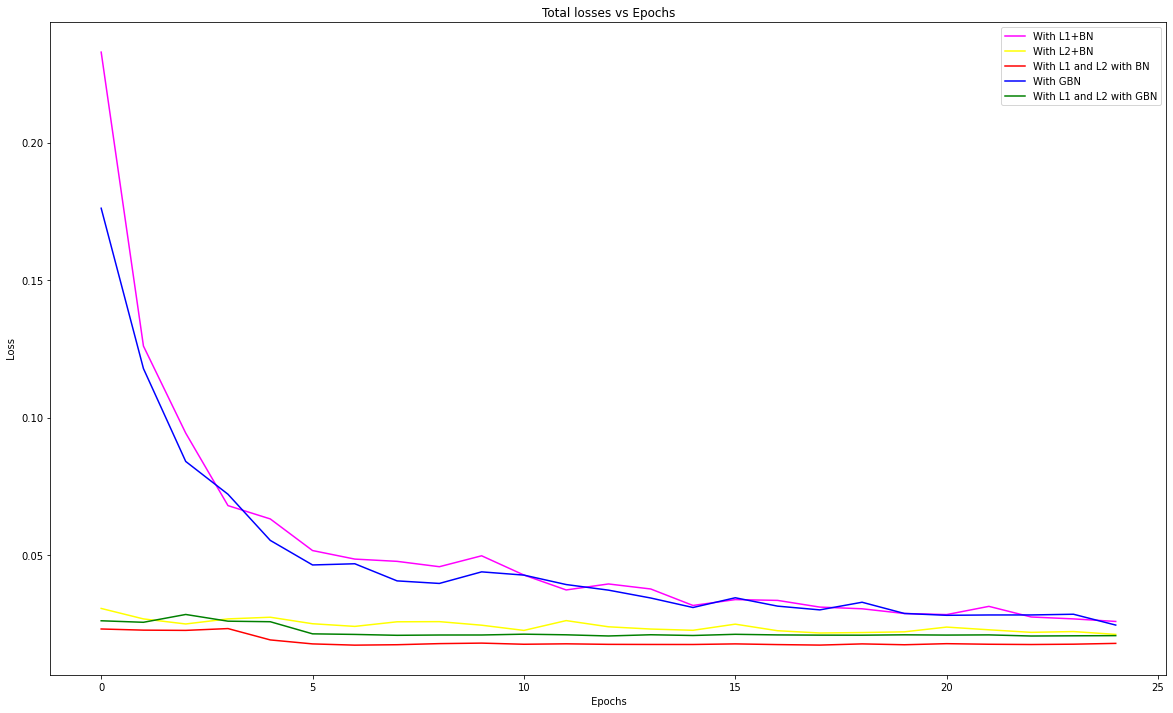

In [ ]:
#Plot for Test Losses for Different Cases
plot_stat(total_test_losses, 'Loss')

[[96.55, 97.43, 98.06, 98.69, 98.69, 98.81, 98.84, 98.79, 98.89, 98.73, 98.8, 99.04, 98.98, 99.03, 99.21, 98.98, 99.11, 99.17, 99.19, 99.24, 99.22, 99.11, 99.24, 99.27, 99.26], [99.14, 99.24, 99.29, 99.28, 99.19, 99.3, 99.31, 99.24, 99.16, 99.31, 99.32, 99.21, 99.31, 99.3, 99.32, 99.26, 99.37, 99.33, 99.33, 99.29, 99.34, 99.35, 99.3, 99.35, 99.38], [99.23, 99.34, 99.31, 99.28, 99.42, 99.44, 99.44, 99.45, 99.38, 99.41, 99.46, 99.42, 99.46, 99.47, 99.46, 99.44, 99.46, 99.44, 99.43, 99.47, 99.44, 99.43, 99.47, 99.42, 99.44], [97.19, 97.99, 98.17, 98.52, 98.9, 98.99, 98.95, 99.05, 99.09, 98.84, 98.87, 98.97, 98.96, 99.09, 99.17, 99.08, 99.16, 99.24, 99.08, 99.2, 99.19, 99.23, 99.2, 99.17, 99.24], [99.25, 99.29, 99.18, 99.22, 99.31, 99.43, 99.38, 99.42, 99.39, 99.38, 99.43, 99.4, 99.39, 99.4, 99.4, 99.41, 99.4, 99.43, 99.37, 99.38, 99.39, 99.4, 99.42, 99.37, 99.39]]


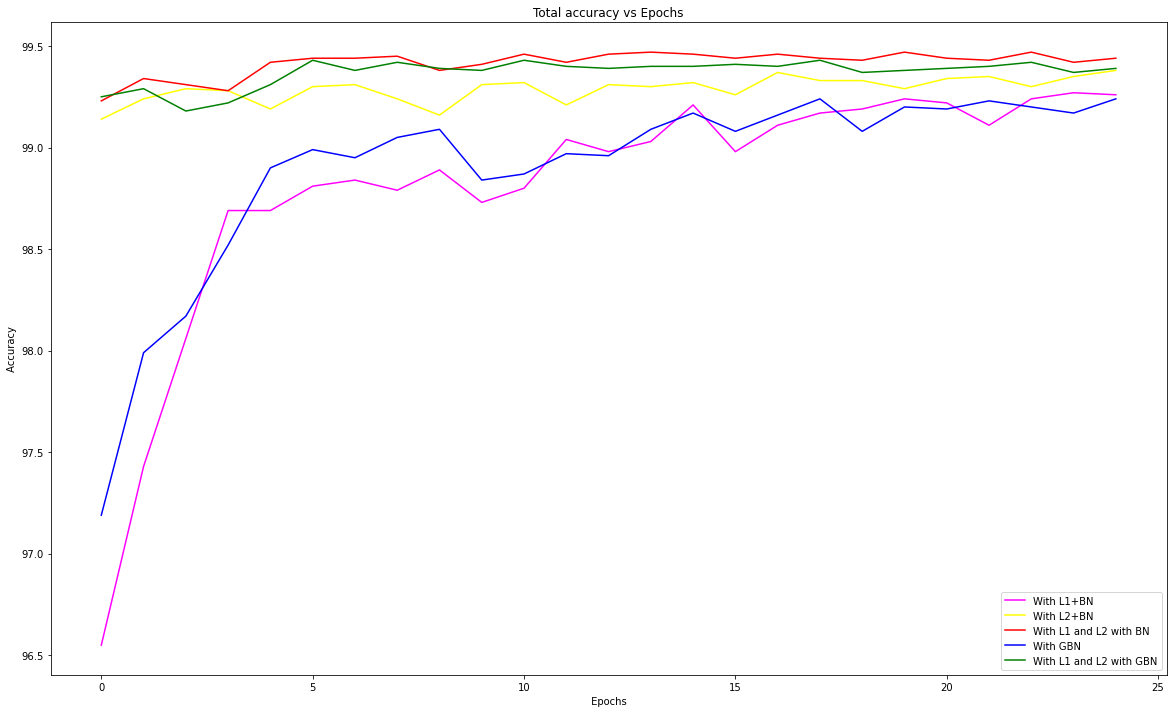

In [ ]:
# Plot for Test accuracy for Different Cases
print(total_test_accuracies)
plot_stat(total_test_accuracies, 'Acc')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


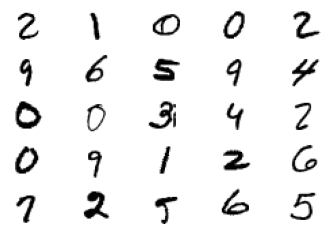

In [ ]:
misclassified_image_finder(model, save_path_gbn, device, train_loader, EPOCHS, "Ghost Batch Normalization")

## Summary:

A simple DNN with Total params=7,612 was created and trained for 25 epochs with L1, L2 Regularization, Batch Normalization and Ghost Batch Normalization. 

Following are the accuracy observed:

> 1. with L1 + BN => **99.26%**
2. with L2 + BN => **99.38%**
3. with L1 and L2 with BN => **99.44%**
4. with GBN => **99.24%**
5. with L1 and L2 with GBN => **99.39%**

Reference:
* GBN:  https://github.com/apple/ml-cifar-10-faster/blob/master/utils.py

